# Mooring Synthesis of Initial NC data (offline)

## 19BS-8A

- from netcdf files
- QC Against other depths

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

import EcoFOCIpy.math.cleaning as cleaning

In [2]:
ncfiles = '/Users/bell/ecoraid/2019/Moorings/19bs8a/final_data_cf/19bs8a*.nc'

mfd = xa.open_mfdataset(ncfiles)
mfd

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 13
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 13
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 13
  result = blockwise(


<xarray.Dataset> Size: 95MB
Dimensions:                (time: 112665, latitude: 1, longitude: 1, depth: 13)
Coordinates:
  * time                   (time) datetime64[ns] 901kB 2019-09-23T22:50:00 .....
  * latitude               (latitude) float64 8B 62.2
  * longitude              (longitude) float64 8B -174.7
  * depth                  (depth) float64 104B 17.0 19.0 20.0 ... 66.0 67.0
Data variables:
    chlor_fluorescence     (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(11308, 1, 1, 1), meta=np.ndarray>
    chlor_fluorescence_QC  (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(11308, 1, 1, 1), meta=np.ndarray>
    temperature            (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(6259, 1, 1, 1), meta=np.ndarray>
    salinity               (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(6259, 1, 1, 1), meta=np.ndarray>
    salinity_QC            (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(18735, 1, 1, 1), meta=np.ndarray>
    oxy_conc               (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(6259, 1, 1, 1), meta=np.ndarray>
    conductivity           (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(18730, 1, 1, 1), meta=np.ndarray>
    pressure               (time, depth, latitude, longitude) float64 12MB dask.array<chunksize=(112665, 1, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      62 12.00 N
    Longitude_DegMMddN:                     174 40.770 W
    MooringID:                              19BS-8A
    platform_deployment_date:               2019-09-23T22:49:00Z
    platform_deployment_cruise_name:        DY1908
    platform_recovery_date:                 2021-11-14T08:11:00Z
    ...                                     ...
    InstrumentSerialNumber:                 3073
    InstrumentType:                         Eco-Fluorometer FLSB
    date_created:                           2022-12-16T06:01:33Z
    date_modified:                          2022-12-16 06:11:34.596477
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nQCd: 2022...

## Salinity(full temporal resolution)

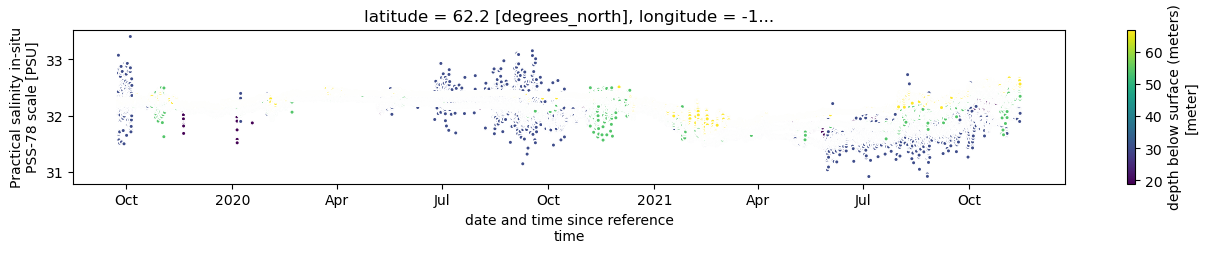

In [3]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="salinity",hue="depth",s=10,ax=ax)

## Hourly/Interpolated plots Plots

Because of the different timebases... quickly either interpolate (linearly) or downsample (this seems slower) to plot all series

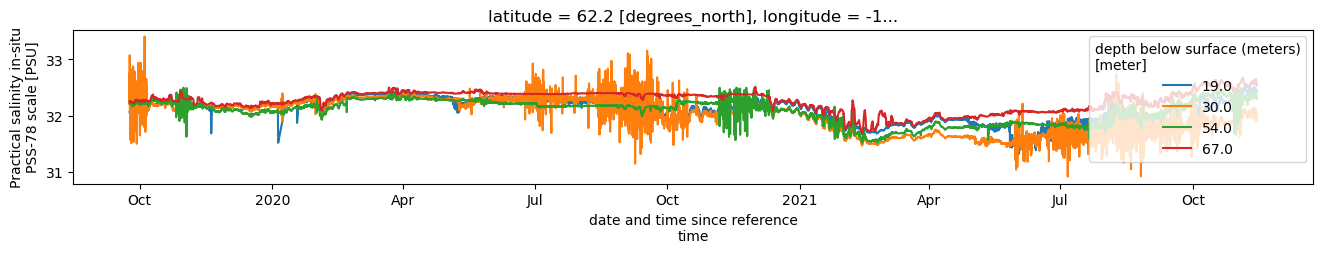

In [4]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.salinity.dropna(dim='depth',how='all').chunk(dict(time=-1)).interpolate_na(dim='time').plot(hue="depth",ax=ax)

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


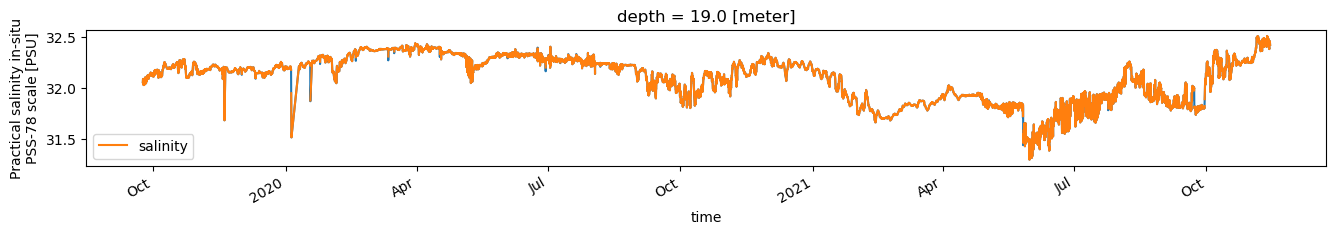

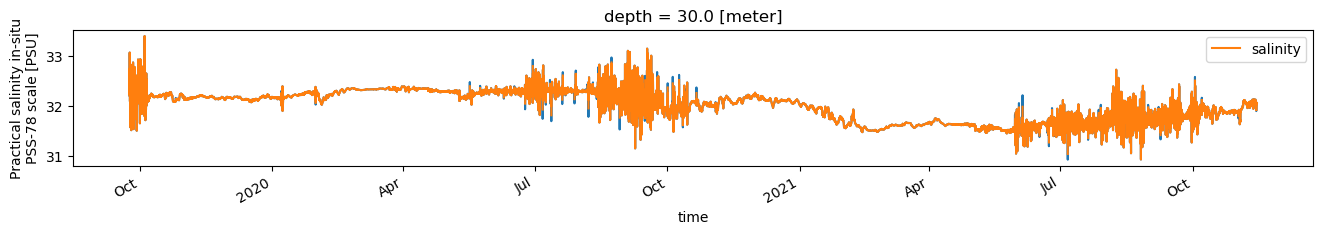

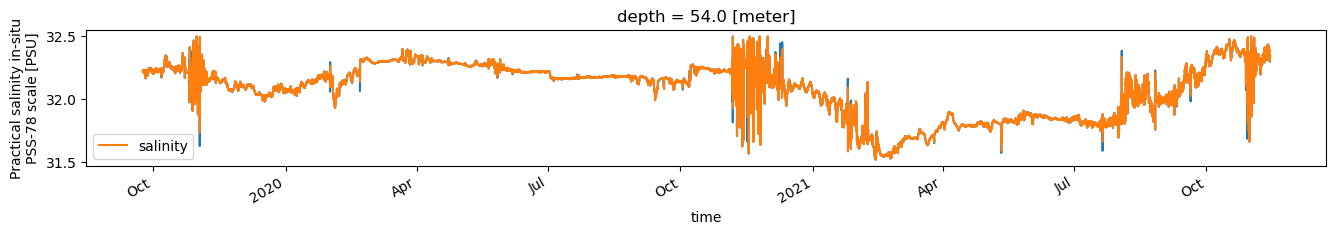

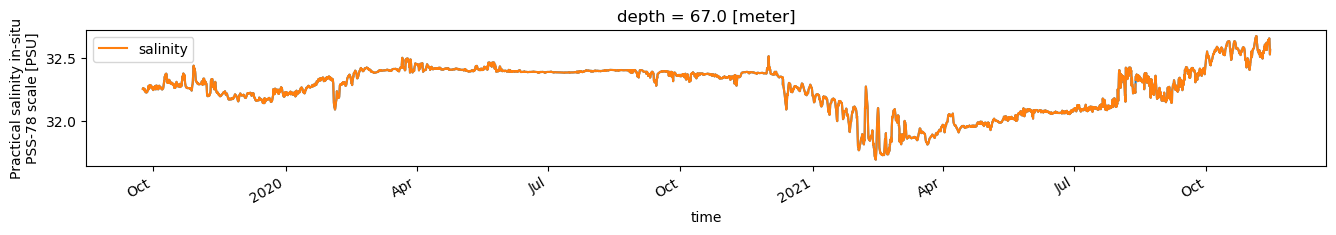

In [47]:
tdf = mfd.isel(latitude=0,longitude=0).salinity.dropna(dim='depth',how='all').reset_coords(drop=True)
for idepth in range(0,len(tdf.depth),1):
    fig, ax = plt.subplots(1,figsize=(16, 2))
    tdf.isel(depth=idepth).chunk(dict(time=-1)).interpolate_na(dim='time').plot(ax=ax)
    cleaning.rolling_outlier_pd(tdf.isel(depth=idepth)
                                .chunk(dict(time=-1))
                                .interpolate_na(dim='time')
                                .to_dataframe()
                                .drop('depth',axis=1),window_size=7*24).plot(ax=ax)
    